In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Data/dataset2.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

scaler = MinMaxScaler((0.01, 0.99))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Lambda, Dense, Normalization, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l1_l2, l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

input_shape = (X_train.shape[1],)

inputs = Input(input_shape)
x = Lambda(lambda x: tf.concat([
    x[:, :2],
    tf.expand_dims(tf.keras.backend.log(x[:, 2]), axis=1),
    tf.expand_dims(x[:, 3], axis=1),
    tf.expand_dims(tf.keras.backend.log(x[:, 4]), axis=1),
    tf.expand_dims(tf.keras.backend.sqrt(x[:, 5]), axis=1)
], axis=1))(inputs)
x = Normalization()(x)
x = Dense(512, activation='relu', kernel_regularizer=l1_l2(1e-3, 1e-3))(x)
x = Dropout(0.1)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.1)(x)
outputs = Dense(2, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])
es = EarlyStopping('val_acc', patience=250, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, shuffle=True, batch_size=32, epochs=10000, callbacks=[es])

Epoch 1/10000
85/85 [==============================] - 1s 10ms/step - loss: 0.7944 - acc: 0.5221 - val_loss: 0.7418 - val_acc: 0.5103
Epoch 2/10000
85/85 [==============================] - 0s 5ms/step - loss: 0.7233 - acc: 0.5305 - val_loss: 0.7043 - val_acc: 0.5765
Epoch 3/10000
85/85 [==============================] - 0s 5ms/step - loss: 0.7014 - acc: 0.5507 - val_loss: 0.7077 - val_acc: 0.5279
Epoch 4/10000
85/85 [==============================] - 0s 5ms/step - loss: 0.6954 - acc: 0.5555 - val_loss: 0.6874 - val_acc: 0.5794
Epoch 5/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.6906 - acc: 0.5680 - val_loss: 0.6835 - val_acc: 0.6000
Epoch 6/10000
85/85 [==============================] - 0s 6ms/step - loss: 0.6849 - acc: 0.5713 - val_loss: 0.6792 - val_acc: 0.5956
Epoch 7/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.6826 - acc: 0.5757 - val_loss: 0.6794 - val_acc: 0.5912
Epoch 8/10000
85/85 [==============================] - 1s 7ms/step -

85/85 [==============================] - 1s 7ms/step - loss: 0.5259 - acc: 0.7467 - val_loss: 0.4991 - val_acc: 0.7691
Epoch 63/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.5310 - acc: 0.7441 - val_loss: 0.5206 - val_acc: 0.7426
Epoch 64/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.5384 - acc: 0.7397 - val_loss: 0.4886 - val_acc: 0.7912
Epoch 65/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.5183 - acc: 0.7544 - val_loss: 0.4818 - val_acc: 0.7794
Epoch 66/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.5152 - acc: 0.7585 - val_loss: 0.5112 - val_acc: 0.7706
Epoch 67/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.5227 - acc: 0.7507 - val_loss: 0.4681 - val_acc: 0.7912
Epoch 68/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.5269 - acc: 0.7478 - val_loss: 0.5162 - val_acc: 0.7544
Epoch 69/10000
85/85 [==============================] - 1s 6ms/step - loss: 0

85/85 [==============================] - 1s 7ms/step - loss: 0.4411 - acc: 0.8136 - val_loss: 0.4656 - val_acc: 0.8074
Epoch 124/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4753 - acc: 0.7864 - val_loss: 0.4062 - val_acc: 0.8382
Epoch 125/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4413 - acc: 0.8066 - val_loss: 0.4285 - val_acc: 0.8221
Epoch 126/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4370 - acc: 0.8051 - val_loss: 0.3901 - val_acc: 0.8294
Epoch 127/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4299 - acc: 0.8199 - val_loss: 0.4694 - val_acc: 0.7971
Epoch 128/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4551 - acc: 0.8070 - val_loss: 0.4331 - val_acc: 0.8132
Epoch 129/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4537 - acc: 0.7941 - val_loss: 0.3868 - val_acc: 0.8456
Epoch 130/10000
85/85 [==============================] - 1s 7ms/step - 

Epoch 184/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4064 - acc: 0.8276 - val_loss: 0.4000 - val_acc: 0.8294
Epoch 185/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4146 - acc: 0.8283 - val_loss: 0.3641 - val_acc: 0.8735
Epoch 186/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4128 - acc: 0.8268 - val_loss: 0.3619 - val_acc: 0.8500
Epoch 187/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4172 - acc: 0.8213 - val_loss: 0.3711 - val_acc: 0.8618
Epoch 188/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3952 - acc: 0.8357 - val_loss: 0.4135 - val_acc: 0.8382
Epoch 189/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4078 - acc: 0.8283 - val_loss: 0.4128 - val_acc: 0.8162
Epoch 190/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.4168 - acc: 0.8235 - val_loss: 0.3875 - val_acc: 0.8338
Epoch 191/10000
85/85 [==============================] 

85/85 [==============================] - 1s 7ms/step - loss: 0.3815 - acc: 0.8426 - val_loss: 0.3844 - val_acc: 0.8441
Epoch 245/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3946 - acc: 0.8360 - val_loss: 0.4001 - val_acc: 0.8368
Epoch 246/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3910 - acc: 0.8357 - val_loss: 0.3874 - val_acc: 0.8500
Epoch 247/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3958 - acc: 0.8401 - val_loss: 0.3865 - val_acc: 0.8412
Epoch 248/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3857 - acc: 0.8390 - val_loss: 0.4261 - val_acc: 0.8118
Epoch 249/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3771 - acc: 0.8412 - val_loss: 0.3628 - val_acc: 0.8721
Epoch 250/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3849 - acc: 0.8382 - val_loss: 0.3777 - val_acc: 0.8647
Epoch 251/10000
85/85 [==============================] - 1s 7ms/step - 

Epoch 305/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3638 - acc: 0.8551 - val_loss: 0.3885 - val_acc: 0.8412
Epoch 306/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3639 - acc: 0.8511 - val_loss: 0.3783 - val_acc: 0.8632
Epoch 307/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3798 - acc: 0.8415 - val_loss: 0.3917 - val_acc: 0.8368
Epoch 308/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3672 - acc: 0.8489 - val_loss: 0.3985 - val_acc: 0.8559
Epoch 309/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3713 - acc: 0.8438 - val_loss: 0.3886 - val_acc: 0.8471
Epoch 310/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3774 - acc: 0.8489 - val_loss: 0.3942 - val_acc: 0.8265
Epoch 311/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3610 - acc: 0.8533 - val_loss: 0.3855 - val_acc: 0.8456
Epoch 312/10000
85/85 [==============================] 

85/85 [==============================] - 1s 7ms/step - loss: 0.3679 - acc: 0.8533 - val_loss: 0.4260 - val_acc: 0.8221
Epoch 366/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3566 - acc: 0.8592 - val_loss: 0.4034 - val_acc: 0.8397
Epoch 367/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3613 - acc: 0.8544 - val_loss: 0.3769 - val_acc: 0.8559
Epoch 368/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3774 - acc: 0.8478 - val_loss: 0.4024 - val_acc: 0.8441
Epoch 369/10000
85/85 [==============================] - 1s 8ms/step - loss: 0.3532 - acc: 0.8551 - val_loss: 0.4081 - val_acc: 0.8426
Epoch 370/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3621 - acc: 0.8515 - val_loss: 0.4899 - val_acc: 0.7971
Epoch 371/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.3519 - acc: 0.8544 - val_loss: 0.3598 - val_acc: 0.8588
Epoch 372/10000
85/85 [==============================] - 1s 7ms/step - 

Epoch 426/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3600 - acc: 0.8544 - val_loss: 0.4611 - val_acc: 0.8176
Epoch 427/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3510 - acc: 0.8551 - val_loss: 0.4230 - val_acc: 0.8338
Epoch 428/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3719 - acc: 0.8471 - val_loss: 0.3552 - val_acc: 0.8603
Epoch 429/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3384 - acc: 0.8632 - val_loss: 0.3830 - val_acc: 0.8574
Epoch 430/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3524 - acc: 0.8651 - val_loss: 0.4709 - val_acc: 0.8015
Epoch 431/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3454 - acc: 0.8654 - val_loss: 0.3695 - val_acc: 0.8603
Epoch 432/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3593 - acc: 0.8544 - val_loss: 0.3512 - val_acc: 0.8794
Epoch 433/10000
85/85 [==============================] 

85/85 [==============================] - 1s 7ms/step - loss: 0.3223 - acc: 0.8779 - val_loss: 0.3674 - val_acc: 0.8868
Epoch 487/10000
85/85 [==============================] - 1s 8ms/step - loss: 0.3552 - acc: 0.8540 - val_loss: 0.4627 - val_acc: 0.8044
Epoch 488/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3479 - acc: 0.8647 - val_loss: 0.4594 - val_acc: 0.8206
Epoch 489/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3345 - acc: 0.8687 - val_loss: 0.3630 - val_acc: 0.8647
Epoch 490/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3321 - acc: 0.8680 - val_loss: 0.3739 - val_acc: 0.8588
Epoch 491/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3355 - acc: 0.8669 - val_loss: 0.3895 - val_acc: 0.8691
Epoch 492/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3263 - acc: 0.8684 - val_loss: 0.4365 - val_acc: 0.8309
Epoch 493/10000
85/85 [==============================] - 1s 7ms/step - 

Epoch 547/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3151 - acc: 0.8831 - val_loss: 0.4138 - val_acc: 0.8412
Epoch 548/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3254 - acc: 0.8801 - val_loss: 0.4345 - val_acc: 0.8500
Epoch 549/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3295 - acc: 0.8706 - val_loss: 0.4296 - val_acc: 0.8353
Epoch 550/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3234 - acc: 0.8735 - val_loss: 0.4312 - val_acc: 0.8353
Epoch 551/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3390 - acc: 0.8603 - val_loss: 0.3849 - val_acc: 0.8544
Epoch 552/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3283 - acc: 0.8680 - val_loss: 0.3936 - val_acc: 0.8471
Epoch 553/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3416 - acc: 0.8599 - val_loss: 0.3854 - val_acc: 0.8529
Epoch 554/10000
85/85 [==============================] 

85/85 [==============================] - 1s 6ms/step - loss: 0.3178 - acc: 0.8717 - val_loss: 0.4813 - val_acc: 0.8176
Epoch 608/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3108 - acc: 0.8768 - val_loss: 0.4594 - val_acc: 0.8118
Epoch 609/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3434 - acc: 0.8676 - val_loss: 0.5234 - val_acc: 0.7912
Epoch 610/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3194 - acc: 0.8710 - val_loss: 0.4021 - val_acc: 0.8544
Epoch 611/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.3007 - acc: 0.8783 - val_loss: 0.3849 - val_acc: 0.8500
Epoch 612/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.3180 - acc: 0.8824 - val_loss: 0.4942 - val_acc: 0.8103
Epoch 613/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3381 - acc: 0.8662 - val_loss: 0.4382 - val_acc: 0.8441
Epoch 614/10000
85/85 [==============================] - 1s 7ms/step - 

Epoch 668/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3115 - acc: 0.8776 - val_loss: 0.5594 - val_acc: 0.8044
Epoch 669/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3229 - acc: 0.8746 - val_loss: 0.4572 - val_acc: 0.8309
Epoch 670/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3257 - acc: 0.8772 - val_loss: 0.3864 - val_acc: 0.8588
Epoch 671/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3210 - acc: 0.8794 - val_loss: 0.4038 - val_acc: 0.8618
Epoch 672/10000
85/85 [==============================] - 1s 8ms/step - loss: 0.3406 - acc: 0.8691 - val_loss: 0.4447 - val_acc: 0.8353
Epoch 673/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3088 - acc: 0.8761 - val_loss: 0.4451 - val_acc: 0.8456
Epoch 674/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3177 - acc: 0.8721 - val_loss: 0.3847 - val_acc: 0.8618
Epoch 675/10000
85/85 [==============================] 

85/85 [==============================] - 1s 7ms/step - loss: 0.3245 - acc: 0.8743 - val_loss: 0.4446 - val_acc: 0.8544
Epoch 729/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3049 - acc: 0.8809 - val_loss: 0.4263 - val_acc: 0.8456
Epoch 730/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3029 - acc: 0.8820 - val_loss: 0.4340 - val_acc: 0.8471
Epoch 731/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3101 - acc: 0.8783 - val_loss: 0.4391 - val_acc: 0.8456
Epoch 732/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3096 - acc: 0.8805 - val_loss: 0.5316 - val_acc: 0.7971
Epoch 733/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.2942 - acc: 0.8890 - val_loss: 0.4224 - val_acc: 0.8529
Epoch 734/10000
85/85 [==============================] - 1s 7ms/step - loss: 0.3044 - acc: 0.8930 - val_loss: 0.4069 - val_acc: 0.8456


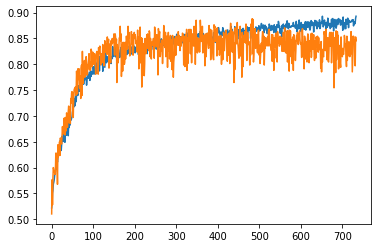

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [19]:
model.evaluate(X_test_scaled, y_test)

19/19 [==============================] - 0s 4ms/step - loss: 0.4041 - acc: 0.8450


[0.40414226055145264, 0.8450000286102295]

In [20]:
mu = X_train.min(axis=0) * 0.99 / 0.98 - 0.01 / 0.98 * X_train.max(axis=0)
sigma = (X_train.max(axis=0) - X_train.min(axis=0)) / 0.98

np.savetxt('Outputs/wong-howard-2.txt', np.vstack([mu.values, sigma.values]))
model.save('Outputs/wong-howard-2.h5')